<a href="https://github.com/Carlosriosch/DeepLearningNotes/blob/master/MNIST/De_ejemplos_a_reglas.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# De ejemplos a reglas
En este notebook se muestra como generar un programa a partir de ejemplos usando TensorFlow.

In [1]:
# Se incluyen las bibliotecas necesarias
#%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generar Datos de prueba

Definimos una función simple y generamos ejemplos de prueba, en este caso:
* las reglas son definidas por la función `f(x)`
* la variable `xs` contiene todos los **inputs** 
* la variable `ys` contiene todos los **outputs**

En este ejemplo, la función definida es $f(x) = x + 5$, y generamos un *dataset* con 20 ejemplos.


In [28]:
def f(x):
  return x + 5
xs = np.arange(0,10,0.5) #Así funcióna arrange np.arrange(desde que numero, hasta que numero, con cuanto de incremento)
ys = f(xs)

In [29]:
# reset de la sesión, en caso de querer reentrenar el modelo
tf.keras.backend.clear_session()

# Neurona Artificial
Este modelo consta de una sola neurona, con un solo input. Se incluye la imágen de la presentación para recordar el concepto de neurona artifical.

<img alt='perceptron' src='./img/Perceptron.png' width="300"/>

Recordar que la función que se ejecuta en la neurona es $\varphi \left( \mathbf{w} \cdot \mathbf{x} + b \right)$ donde:
* $\varphi$ es una función arbitratia, derivable, usualmente no lineal
* $\mathbf{w}$ son los coeficientes de cada *input* 
* $b$ es el *bias*, un parámetro entrenable que no depende de los valores de entrada.


In [30]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])]) #Con esto decimos que el model sera una capa de una sola unidad conectada (dense) a todos los parametros que en este caso es uno y el bias. 

Compilamos el modelo, indicando la función de optimización que deseamos utilizar. En este caso, la función es [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD?version=stable). 

Además, indicamos la función a optimizar (o *loss function*, pues se busca minimizar la "perdida" o *loss*). En este caso, usamos el [Mean Squared Error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MSE?version=stable) o "error cuadrado promedio". Esta función es adecuada para problemas de regresión, pues penaliza con más severidad a los valores más lejanos al valor de entrenamiento dado por los ejemplos.

In [31]:
model.compile(optimizer='sgd', loss='mse')

Podemos ver un resumen del modelo, que nos indica información útil como el detalle de cada *layer* y la cantidad de parámetros del modelo.

En este caso contamos con una sola neurona, y por lo tanto 2 parámetros:
1. el coeficiente que se multiplica al valor de entrada.
2. el valor de *bias* que se suma a la combinación lineal de valores de entrada.

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Entrenando la red neuronal
El entrenamiento consiste en actualizar los parámetros del modelo basado en los ejemplos del *dataset*. En cada *epoch*, se muestra todo el *dataset* y se actualizan los parámetros del modelo. En este ejemplo, usamos 500 *epochs* para entrenar nuestro modelo.

In [33]:
model.fit(xs, ys, epochs=500) #Cuando ya tenemos el modelo armado con Tf, entonces lo ajustamos a nuestros datos y con nuestros labels. 

 4ms/step - loss: 0.2707
Epoch 252/500
1/1 [==============================] - 0s 0s/step - loss: 0.2672
Epoch 253/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2637
Epoch 254/500
1/1 [==============================] - 0s 0s/step - loss: 0.2603
Epoch 255/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2569
Epoch 256/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 257/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2503
Epoch 258/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2471
Epoch 259/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2439
Epoch 260/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2408
Epoch 261/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 262/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 263/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2315
Epoch 264/500
1/1

Una vez que el modelo está entrenado, podemos determinar su presición imprimiendo un valor conocido, y comparándolo con el valor real generado por la
función `f` que queremos aproximar.

In [34]:
print(model.predict([5]))

[[9.972493]]


Quizás sea sorpresivo que el valor no es exactamente igual a 10 luego de entrenar el modelo con 500 iteraciones del *dataset*.

Por esto es importante recordar que las redes neuronales se
entrenan calculando probabilidades, y el modelo aprendió que existe una relación entre los *inputs* y *outputs* que es altamente probable dados los ejemplos en el *dataset*. Aún así, "altamente probable" no significa "exactamente".

Vi que la forma en la que predict se acerca al valor real varía, así que voy a graficar ambos valores para ver si en algun rato converge. 

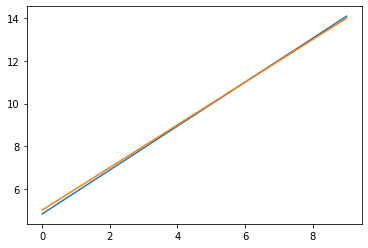

In [36]:
pr=[]
re=[]
for i in range(10):
    #print(model.predict([i]))
    pr.append(float(model.predict([i])))
    re.append(float(i+5))
plt.plot(pr)
plt.plot(re)
plt.show()